In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import chdir
chdir('/content/drive/MyDrive/IA/datasets/infomoney')

In [3]:
!pip install nltk
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-04-12 01:56:32.416950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 01:56:33.312679: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 88.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [4]:
import nltk
from nltk.stem import WordNetLemmatizer, RSLPStemmer
from nltk.corpus import stopwords
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.4 MB/s eta 0:00:00


In [6]:
import spacy
nlp = spacy.load("pt_core_news_sm")

In [7]:
def remove_stopwords(text, language="portuguese"):
    words = nltk.word_tokenize(text)
    stopwords_list = set(stopwords.words(language))
    filtered_words = [word for word in words if word.lower() not in stopwords_list]
    return " ".join(filtered_words)

def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc]
    return " ".join(lemmatized_words)

def stemize_text(text):
    stemmer = RSLPStemmer()
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return " ".join(stemmed_words)

In [8]:
import pandas as pd

In [9]:
infomoney_df = pd.read_csv('infomoney_news_labelled_cleaned.csv')
infomoney_df

,text,label
0,Secretário da Fazenda diz que medidas do gover...,positiva
1,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...",negativa
2,"Com alta de preços e crédito escasso, aumenta ...",neutra
3,“Pelo menos há agora um aceno à disciplina fis...,neutra
4,IR 2023: Posso ficar sem declarar um bem que f...,neutra
...,...,...
1326,Lojas Renner (LREN3) reporta números fracos e ...,neutra
1327,Lula volta a sinalizar que pode discutir auton...,neutra
1328,Lula sobre Campos Neto: se não posso influir p...,negativa
1329,Embraer (EMBR3) entrega 80 jatos no 4º trimest...,positiva


In [10]:
label_dict = {
    'positiva': 2,
    'neutra': 1,
    'negativa': 0
}

infomoney_df['label'] = infomoney_df['label'].apply(lambda label: label_dict[label])
infomoney_df

,text,label
0,Secretário da Fazenda diz que medidas do gover...,2
1,"Trade hoje: Mesmo acima dos 100 mil, Ibovespa ...",0
2,"Com alta de preços e crédito escasso, aumenta ...",1
3,“Pelo menos há agora um aceno à disciplina fis...,1
4,IR 2023: Posso ficar sem declarar um bem que f...,1
...,...,...
1326,Lojas Renner (LREN3) reporta números fracos e ...,1
1327,Lula volta a sinalizar que pode discutir auton...,1
1328,Lula sobre Campos Neto: se não posso influir p...,0
1329,Embraer (EMBR3) entrega 80 jatos no 4º trimest...,2


In [11]:
import re

def preprocess(text, tags=True, urls=True, special=False, isolated=False, stopwords=True):
    if tags:
        text = re.sub(r'<.*?>', ' ', text) # Remove tags HTML
    if urls:
        text = re.sub(r'http\S+', ' ', text) # Remove URLs
    if special:
        text = re.sub(r'[^\w\s]', ' ', text) # Remove special characters
    if isolated:
        text = re.sub(r'\b[a-zA-Z]\b', '', text) # Remove isolated letters
    if stopwords:
        text = remove_stopwords(text)

    return text

In [12]:
infomoney_df['text'] = infomoney_df['text'].apply(preprocess)
infomoney_df

,text,label
0,Secretário Fazenda diz medidas governo abrirão...,2
1,"Trade hoje : acima 100 mil , Ibovespa segue te...",0
2,"alta preços crédito escasso , aumenta busca ca...",1
3,"“ menos agora aceno disciplina fiscal ” , diz ...",1
4,IR 2023 : Posso ficar declarar bem vendido fal...,1
...,...,...
1326,Lojas Renner ( LREN3 ) reporta números fracos ...,1
1327,Lula volta sinalizar pode discutir autonomia B...,1
1328,Lula sobre Campos Neto : posso influir reduzir...,0
1329,Embraer ( EMBR3 ) entrega 80 jatos 4º trimestr...,2


In [13]:
infomoney_df.to_csv('infomoney_news_lebelled_preprocessed.csv', index=False)

# Análise

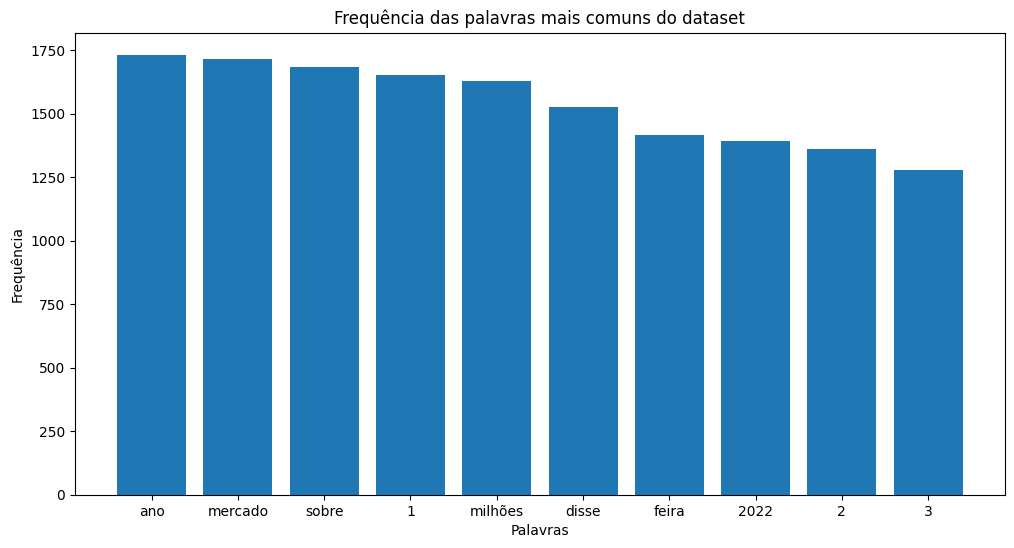

In [119]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt

all_texts = ' '.join(infomoney_df['text'])

all_texts = preprocess(all_texts, special=True, isolated=True)

# Tokenização
tokens = nltk.word_tokenize(all_texts)

# Frequência de palavras
freq_dist = FreqDist(tokens)

# Selecionar as 10 palavras mais frequentes
top_words = freq_dist.most_common(10)

# Criar um gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar([word[0] for word in top_words], [word[1] for word in top_words])
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.title('Frequência das palavras mais comuns do dataset')
plt.show()

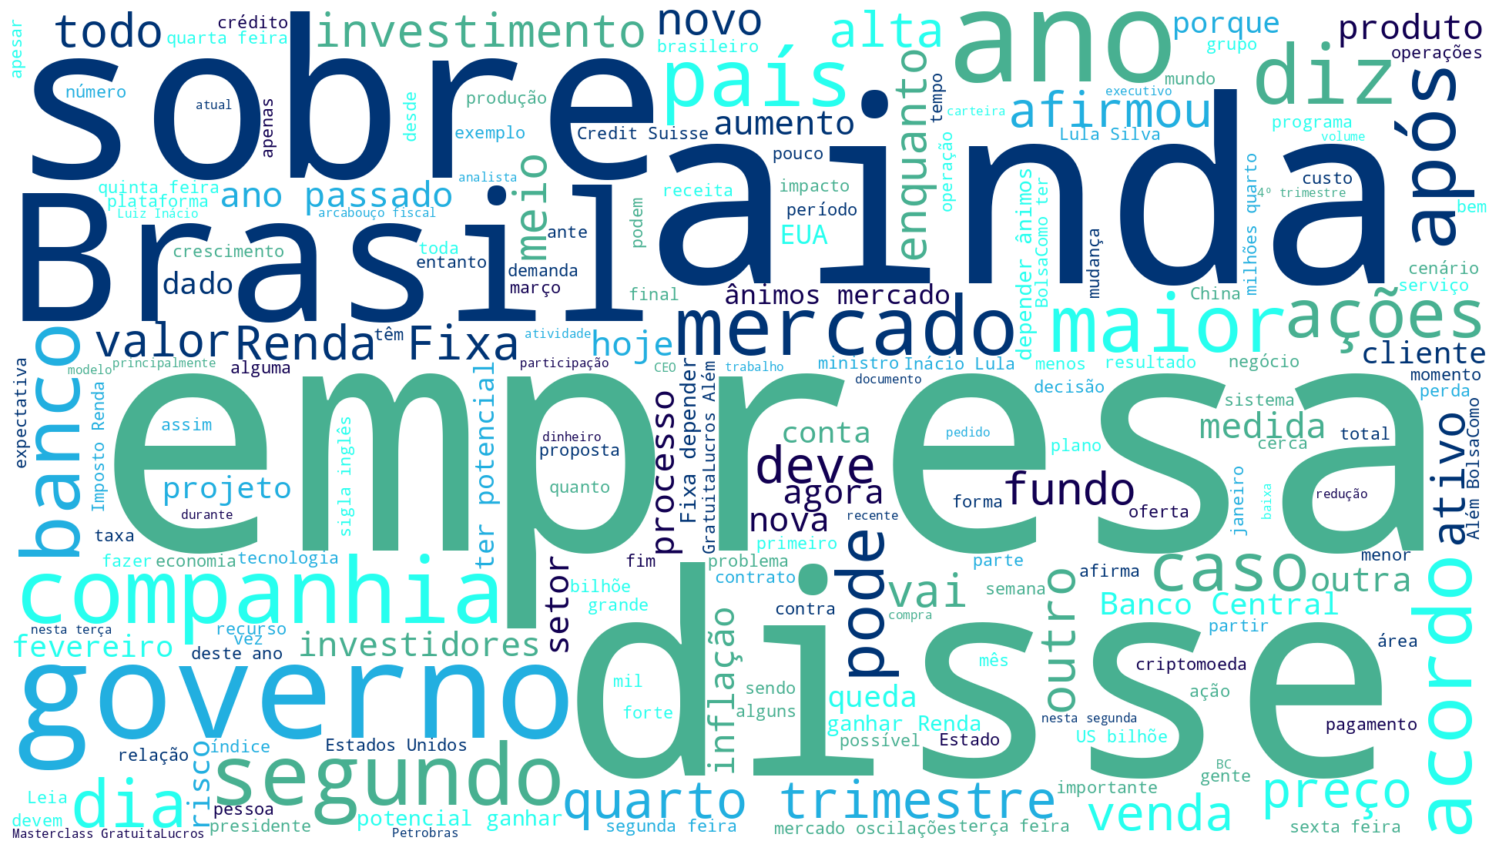

In [124]:
from wordcloud import WordCloud, ImageColorGenerator
import random

def color_func(*args, **kwargs):
    color_palette = ['#22AFE0', '#003475', '#27FFEF', '#48B091', '#120052']
    return random.choice(color_palette)

wordcloud = WordCloud(width=1920, height=1080, background_color='white', color_func=color_func).generate(all_texts)

# Plotar a nuvem de palavras
plt.figure(figsize=(19.2, 10.8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

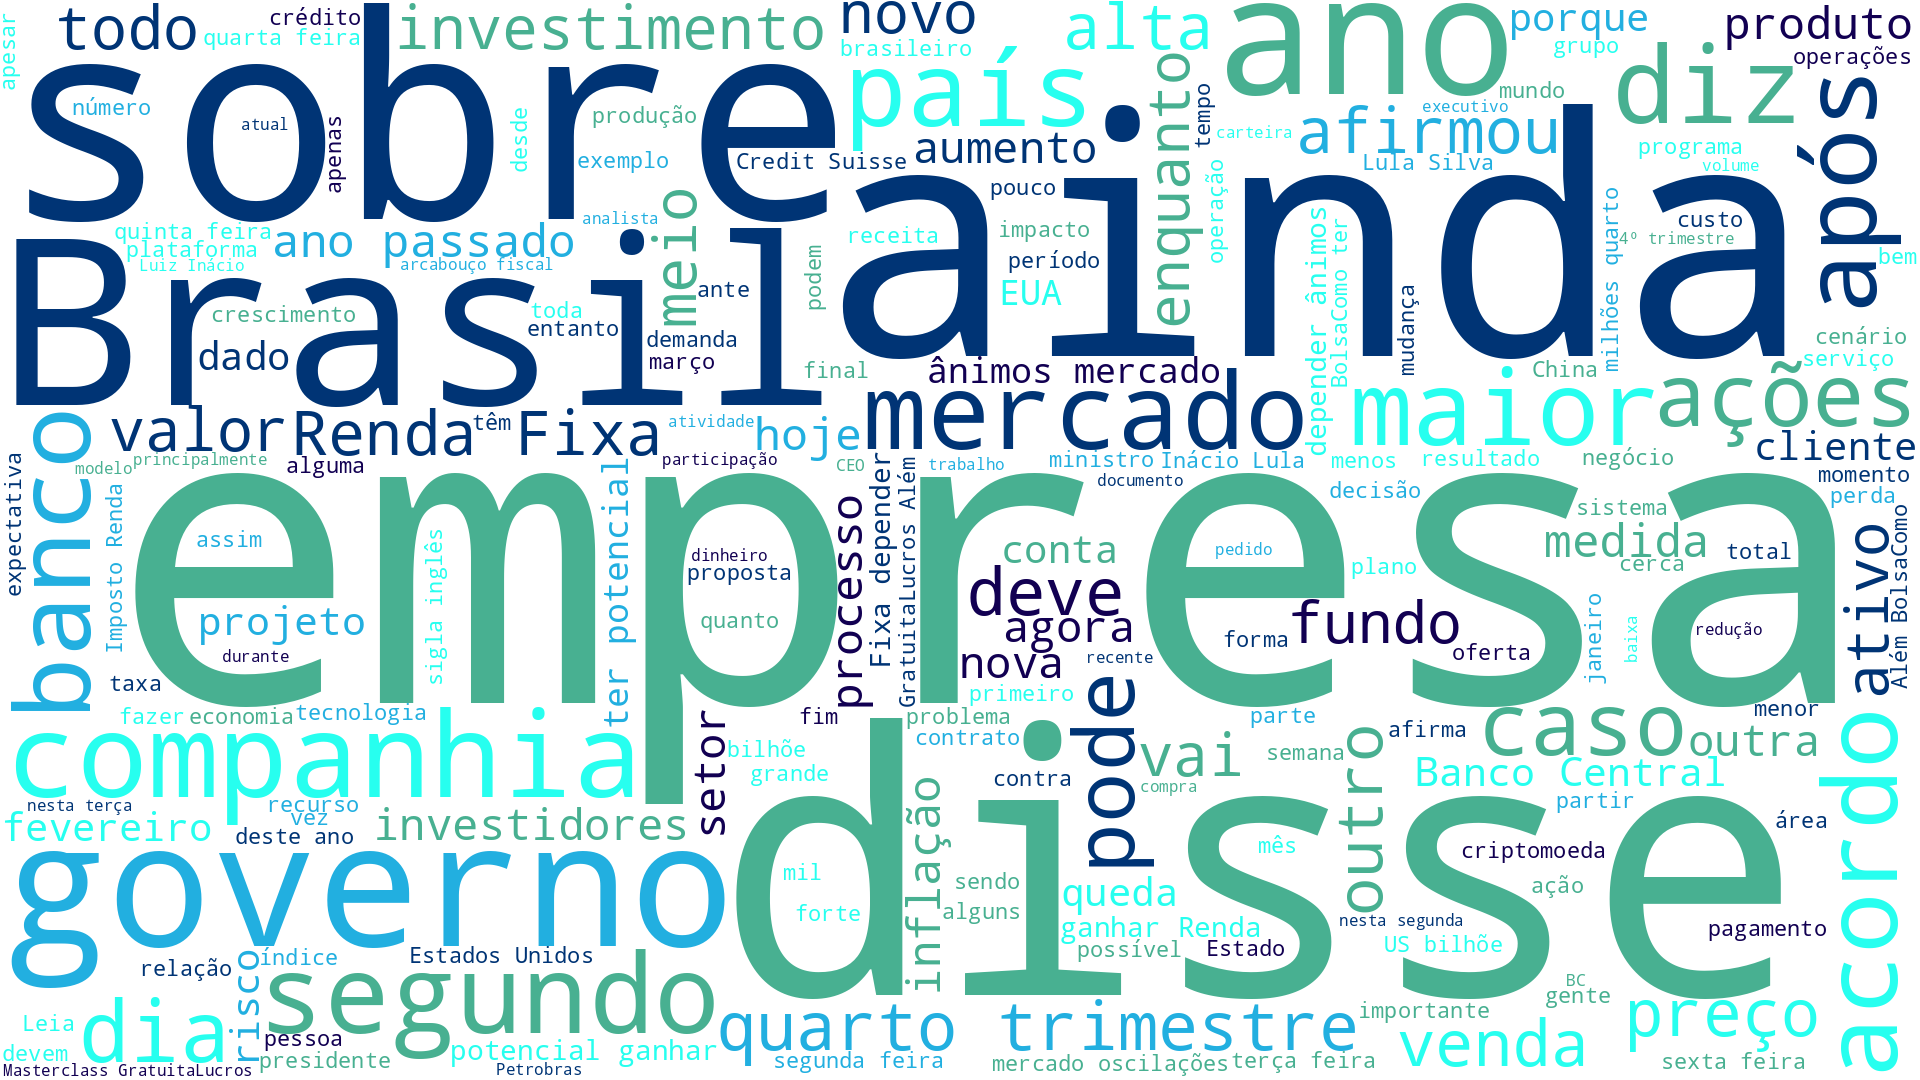

In [125]:
wordcloud.to_image()

In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize textos e calcular frequências das palavras
words = []
for text in df['text']:
    words.extend(word_tokenize(text))

word_freq = Counter(words)

# Exibir as 10 palavras mais frequentes
print(word_freq.most_common(10))